# Process results into a nested dictionary structure

In [7]:
import os
import pandas as pd 
import numpy 

nested_result_dict = {}

methods = ["BBVI", "Langevin", "LLLA", "Combined methods", "Flows"]
datasets = ["mnist", "fashion_mnist"]
T_values = [1, 2, 20, 200, 25, 250, 2500]

K_values = [10, 100, 1000]
sigma_values = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
low_rank_values = [0,1,2,5,10]
metrics = ['Accuracy', 'Entropy', 'LPD', 'ECE', 'MCE', 'OOD']
import os 
print(os.getcwd())

#results\hpc_outputs2\mnist_lowrank_SWA_K=10_T=1_batch_size=500_step_size=0.0005_iter_100000.csv
for method in ["BBVI"]:
    nested_result_dict[f"method={method}"] = {}
    for dataset in datasets:
        nested_result_dict[f"method={method}"][f"dataset={dataset}"] = {}
        for K in K_values:
            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"] = {}
            for T in T_values:
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"] = {}
                result_file = f"BBVI_results/{method}_{dataset}_lowrank_SWA_K={K}_T={T}_batch_size=500_step_size=0.0005_iter_100000.csv"
                if os.path.exists(result_file):
                    result_df = pd.read_csv(result_file, index_col=0)
                    result_df.columns = result_df.columns.str.replace(" ", "")
                    result_df.index = result_df.index.str.replace(" ", "")
                    for low_rank in low_rank_values:
                        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"] = {}
                        for sigma in sigma_values:
                            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"][f"sigma={sigma}"] = {}
                            for metric in metrics:
                                try:
                                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"][f"sigma={sigma}"][metric] = result_df[f"K={K},T={T},low_rank={low_rank},prior_var={sigma}"].loc[metric]
                                except:
                                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"][f"sigma={sigma}"][metric] = 0
                else:
                    for low_rank in low_rank_values:
                        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"] = {}
                        for sigma in sigma_values:
                            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"][f"sigma={sigma}"] = {}
                            for metric in metrics:
                                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank={low_rank}"][f"sigma={sigma}"][metric] = 0


for method in ["LLLA"]:
    nested_result_dict[f"method={method}"] = {}

    result_file_fm = "LLLA_results/fashion_mnist_LLLA.csv"
    result_file_m = "LLLA_results/mnist_LLLA.csv"
    for dataset in datasets:
        nested_result_dict[f"method={method}"][f"dataset={dataset}"] = {}
        if dataset == "mnist":
            result_df = pd.read_csv(result_file_m, index_col=0)
            result_df.columns = result_df.columns.str.replace(" ", "")
            result_df.index = result_df.index.str.replace(" ", "")
        else:
            result_df = pd.read_csv(result_file_fm, index_col=0)
            result_df.columns = result_df.columns.str.replace(" ", "")
            result_df.index = result_df.index.str.replace(" ", "")
        
        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K=0"] = {}
        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K=0"][f"T=1"] = {}
        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K=0"][f"T=1"]["low_rank=0"] = {} 
        for sigma in sigma_values:
            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K=0"][f"T=1"]["low_rank=0"][f"sigma={sigma}"] = {}
            for metric in metrics:
                try:
                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K=0"][f"T=1"]["low_rank=0"][f"sigma={sigma}"][metric] = result_df[f"prior_sigma={sigma}"].loc[metric]
                except:
                    pass

for method in ["Langevin"]:
    nested_result_dict[f"method={method}"] = {}

    result_file_fm = "Langevin_results/FashionMNIST_different_combinations_Langevin_batchsize_500.csv"
    result_file_m = "Langevin_results/MNIST_different_combinations_Langevin_batchsize_500.csv"
    for dataset in datasets:
        nested_result_dict[f"method={method}"][f"dataset={dataset}"] = {}
        if dataset == "mnist":
            result_df = pd.read_csv(result_file_m, index_col=0)
            result_df.columns = result_df.columns.str.replace(" ", "")
            result_df.index = result_df.index.str.replace(" ", "")
        else:
            result_df = pd.read_csv(result_file_fm, index_col=0)
            result_df.columns = result_df.columns.str.replace(" ", "")
            result_df.index = result_df.index.str.replace(" ", "")
        for K in K_values:
            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"] = {}
            for T in T_values:
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"] = {}
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"] = {} 
                for sigma in sigma_values:
                    
                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"][f"sigma={sigma}"] = {}
                    for metric in metrics:
                        try:
                            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"][f"sigma={sigma}"][metric] = result_df[f"K={K},T={T},prior_sigma={sigma}"].loc[metric]
                        except:
                            pass


num_transformations_list = [10, 30]
for method in ["Flows"]:
    nested_result_dict[f"method={method}"] = {}
    for dataset in datasets:
        nested_result_dict[f"method={method}"][f"dataset={dataset}"] = {}
        for K in K_values:
            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"] = {}
            for T in T_values:
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"] = {}
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"] = {}
                for num_transformations in num_transformations_list:
                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"][f"num_transformations={num_transformations}"] = {}
                    if num_transformations == 30:
                        it = 120000
                    else:
                        it = 60000
                    fm_T_vary = f"Flow_results/fashion_mnist_batch_size=500_step_size=0.0005_maxitt={it}.csv"
                    fm_T_fixed = f"Flow_results/fashion_mnist_T=1_batch_size=500_step_size=0.0005_maxitt={it}.csv"
                    m_T_vary = f"Flow_results/mnist_batch_size=500_step_size=0.0005_maxitt={it}.csv"
                    m_T_fixed = f"Flow_results/mnist_T=1_batch_size=500_step_size=0.0005_maxitt={it}.csv"
            
                    if T > 1:
                        if dataset == "mnist":
                            result_df = pd.read_csv(m_T_vary, index_col=0)
                        elif dataset == "fashion_mnist":
                            result_df = pd.read_csv(fm_T_vary, index_col=0)
                    else:
                        if dataset == "mnist":
                            result_df = pd.read_csv(m_T_fixed, index_col=0)
                        elif dataset == "fashion_mnist":
                            result_df = pd.read_csv(fm_T_fixed, index_col=0)

                    result_df.columns = result_df.columns.str.replace(" ", "")
                    result_df.index = result_df.index.str.replace(" ", "")
                    for sigma in sigma_values:
                        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"][f"num_transformations={num_transformations}"][f"sigma={sigma}"] = {}
                        for metric in metrics:
                            try:
                                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"]["low_rank=0"][f"num_transformations={num_transformations}"][f"sigma={sigma}"][metric] = result_df[f"K={K},T={T},prior_sigma={sigma},num_transformations={num_transformations}"].loc[metric]
                            except:
                                pass



#hpc_outputs2\Combined_methods_results\fashion_mnist_combined_methods_K=10_T=1_batch_size=500_step_size=0.0005_iter_100000.csv
    for method in ["subspace_and_full_LL"]:
        nested_result_dict[f"method={method}"] = {}
        for dataset in datasets:
            nested_result_dict[f"method={method}"][f"dataset={dataset}"] = {}
            for K in K_values:
                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"] = {}
                for T in T_values:
                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"] = {}
                    result_file = f"Combined_methods_results/{dataset}_subspace_and_full_LL_K={K}_T={T}_batch_size=500_step_size=0.0005_iter_100000.csv"
                    if os.path.exists(result_file):
                        result_df = pd.read_csv(result_file, index_col=0)
                        result_df.columns = result_df.columns.str.replace(" ", "")
                        result_df.index = result_df.index.str.replace(" ", "")
                        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"] = {}
                        for sigma in sigma_values:
                            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"][f"sigma={sigma}"] = {}
                            for metric in metrics:
                                try:
                                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"][f"sigma={sigma}"][metric] = result_df[f"K={K},T={T},prior_sigma={sigma}"].loc[metric]
                                except:
                                    nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"][f"sigma={sigma}"][metric] = 0
                    else:
                        nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"] = {}
                        for sigma in sigma_values:
                            nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"][f"sigma={sigma}"] = {}
                            for metric in metrics:
                                nested_result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={T}"][f"low_rank=0"][f"sigma={sigma}"][metric] = 0




                        


print(nested_result_dict)

#save the dict
import pickle
with open("nested_result_dict.pkl", "wb") as f:
    pickle.dump(nested_result_dict, f)

c:\Users\johau\Desktop\Approximate inference methods for BNNs\approximate_bayesian_inference_methods\results\hpc_outputs2
{'method=BBVI': {'dataset=mnist': {'K=10': {'T=1': {'low_rank=0': {'sigma=1e-06': {'Accuracy': 0.9894, 'Entropy': 0.0233, 'LPD': -0.0307, 'ECE': 0.0036, 'MCE': 0.1889, 'OOD': 1.2168}, 'sigma=1e-05': {'Accuracy': 0.9894, 'Entropy': 0.0233, 'LPD': -0.0307, 'ECE': 0.0036, 'MCE': 0.1889, 'OOD': 1.2168}, 'sigma=0.0001': {'Accuracy': 0.9894, 'Entropy': 0.0232, 'LPD': -0.0307, 'ECE': 0.0036, 'MCE': 0.1889, 'OOD': 1.217}, 'sigma=0.001': {'Accuracy': 0.9894, 'Entropy': 0.0232, 'LPD': -0.0307, 'ECE': 0.0034, 'MCE': 0.1763, 'OOD': 1.2181}, 'sigma=0.01': {'Accuracy': 0.9895, 'Entropy': 0.023, 'LPD': -0.0303, 'ECE': 0.0033, 'MCE': 0.3922, 'OOD': 1.2257}, 'sigma=0.1': {'Accuracy': 0.9898, 'Entropy': 0.0227, 'LPD': -0.0297, 'ECE': 0.0039, 'MCE': 0.3909, 'OOD': 1.2398}, 'sigma=1': {'Accuracy': 0.9897, 'Entropy': 0.0227, 'LPD': -0.0296, 'ECE': 0.0035, 'MCE': 0.3862, 'OOD': 1.2434}, 

In [8]:
with open("nested_result_dict.pkl", "rb") as f:
     nested_result_dict = pickle.load(f)

nested_result_dict["method=subspace_and_full_LL"]["dataset=fashion_mnist"]["K=10"]["T=1"]["low_rank=0"]
#result_df

{'sigma=1e-06': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=1e-05': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=0.0001': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=0.001': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=0.01': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=0.1': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=1': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0},
 'sigma=10': {'Accuracy': 0,
  'Entropy': 0,
  'LPD': 0,
  'ECE': 0,
  'MCE': 0,
  'OOD': 0}}

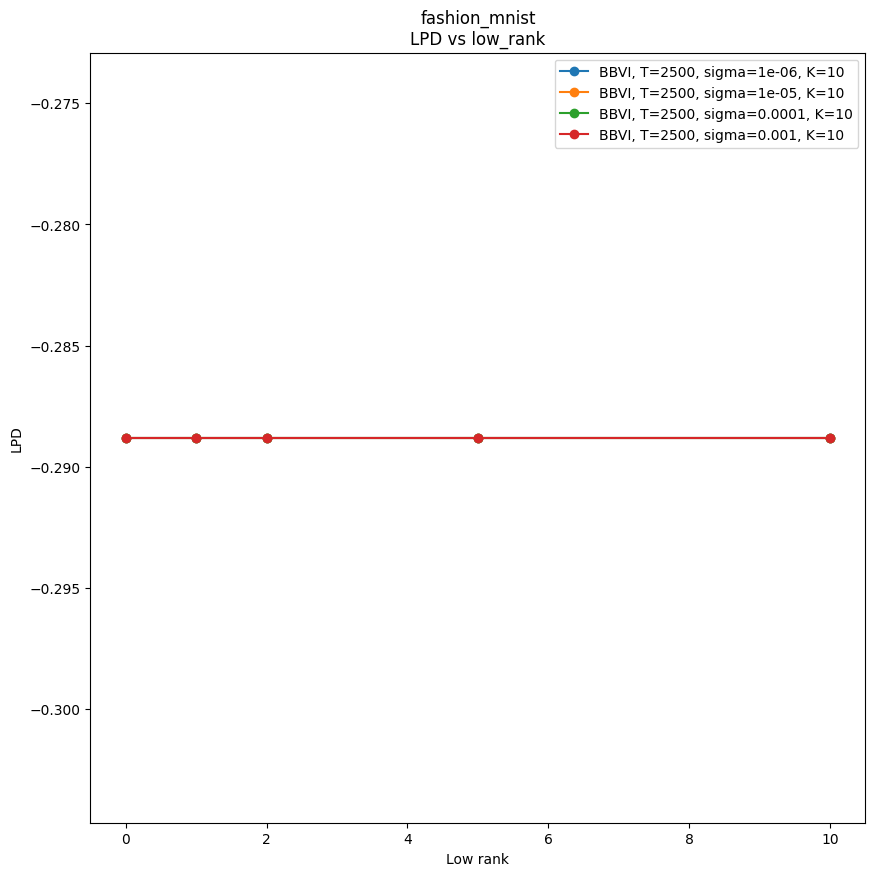

In [16]:
#load the dict
with open("nested_result_dict.pkl", "rb") as f:
     nested_result_dict = pickle.load(f)

import tkinter as tk
from tkinter import ttk, Checkbutton, BooleanVar, StringVar, IntVar
import matplotlib.pyplot as plt


def plot_graph(ax, result_dict, dataset = "mnist", methods = ["BBVI"], 
               T_types = ["fixed"],  plot_by="prior_var", 
               filter_by = {"low_rank":[0], "K":[10], "prior_var": []}, metric = ["Accuracy"]):
     
     KT_dict = {"mnist": {"K=10": "T=200", "K=100": "T=20", "K=1000": "T=2"},
                 "fashion_mnist": {"K=10": "T=2500", "K=100": "T=250", "K=1000": "T=25"}}
     
     
     for method in methods:
          for i, T_type in enumerate(T_types):
               if plot_by == "prior_var":
                    x = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
                    for low_rank in filter_by["low_rank"]:
                         for K in filter_by["K"]:
                              for m in metric:
                                   if T_type == "fixed":
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={1}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for sigma in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {T_type} T, low_rank={low_rank}, K={K}")
                                   else:
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"{KT_dict[dataset][f'K={K}']}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for sigma in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {KT_dict[dataset][f'K={K}']}, low_rank={low_rank}, K={K}")
                    ax.set_xscale('log')
                    ax.set_xlabel("Prior sigma")

               elif plot_by == "low_rank":
                    x = [0, 1, 2, 5, 10]
                    for sigma in filter_by["prior_var"]:
                         for K in filter_by["K"]:
                              for m in metric:
                                   if T_type == "fixed":
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={1}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for low_rank in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {T_type} T, sigma={sigma}, K={K}")
                                   else:
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"{KT_dict[dataset][f'K={K}']}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for low_rank in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {KT_dict[dataset][f'K={K}']}, sigma={sigma}, K={K}")
                    ax.set_xlabel("Low rank")

               elif plot_by == "K":
                    x = [10, 100, 1000]
                    for sigma in filter_by["prior_var"]:
                         for low_rank in filter_by["low_rank"]:
                              for m in metric:
                                   if T_type == "fixed":
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"T={1}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for K in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {T_type} T, sigma={sigma}, low_rank={low_rank}")
                                   else:
                                        y = [result_dict[f"method={method}"][f"dataset={dataset}"][f"K={K}"][f"{KT_dict[dataset][f'K={K}']}"][f"low_rank={low_rank}"][f"sigma={sigma}"][m] for K in x]
                                        ax.plot(x, y, 'o-', label=f"{method}, {KT_dict[dataset][f'K={K}']}, sigma={sigma}, low_rank={low_rank}")
                    ax.set_xlabel("K")
                    ax.set_xscale('log')


     ax.set_ylabel(metric[0])
     ax.set_title(f"{dataset}\n{metric[0]} vs {plot_by}")
     ax.legend()
     plt.draw()

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plot_graph(ax, nested_result_dict, dataset = "fashion_mnist", methods = ["BBVI"],
               T_types = ["vary"],  plot_by="low_rank", 
               filter_by = {"low_rank":[0, 1, 2, 5, 10], "K":[10], 
                            "prior_var": [1e-6, 1e-5, 1e-4, 1e-3]}, 
                            metric = ["LPD"])

datasets = ["mnist", "fashion_mnist"]
methods = ["BBVI", "Langevin"]
T_types = ["fixed", "vary"]
plot_by = ["prior_var", "low_rank", "K"]
filter_by = {"low_rank":[0], "K":[10], "prior_var": [1e-5]}
metrics = ['Accuracy', 'Entropy', 'LPD', 'ECE', 'MCE', 'OOD']

In [102]:
import numpy as np

P = np.random.rand(10000, 10000)

P_inv = np.linalg.inv(P)

In [105]:
45000**2

2025000000